In [116]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz

In [117]:
df = pd.read_csv('online_classroom_data.csv', index_col=0, sep=',')
df.head()

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,1,0,0,0,0,6,0,1,1600,2.1,2.4,3.5,3.6,1.7,0
1,1,0,0,1,0,2,0,3,592,0.3,0.3,0.0,0.1,0.2,0
2,2,4,3,9,0,16,1,8,1110,8.0,5.0,5.0,7.0,5.0,1
3,5,1,3,9,2,11,0,8,8651,6.0,5.0,4.0,6.0,4.0,1
4,14,6,15,28,0,50,0,45,34172,8.7,9.0,6.5,10.0,8.8,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_posts         71 non-null     int64  
 1   helpful_post        71 non-null     int64  
 2   nice_code_post      71 non-null     int64  
 3   collaborative_post  71 non-null     int64  
 4   confused_post       71 non-null     int64  
 5   creative_post       71 non-null     int64  
 6   bad_post            71 non-null     int64  
 7   amazing_post        71 non-null     int64  
 8   timeonline          71 non-null     int64  
 9   sk1_classroom       71 non-null     float64
 10  sk2_classroom       71 non-null     float64
 11  sk5_classroom       71 non-null     float64
 12  sk3_classroom       71 non-null     float64
 13  sk4_classroom       71 non-null     float64
 14  Approved            71 non-null     int64  
dtypes: float64(5), int64(10)
memory usage: 8.9 KB


In [119]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_posts,71.0,5.507042,6.480461,0.0,2.00,4.0,7.5,46.0
helpful_post,71.0,4.028169,6.843082,0.0,0.00,3.0,5.5,53.0
nice_code_post,71.0,7.478873,12.746831,0.0,0.00,2.0,12.5,90.0
collaborative_post,71.0,11.366197,13.970622,0.0,1.50,7.0,16.0,89.0
confused_post,71.0,0.549296,1.350013,0.0,0.00,0.0,0.0,7.0
creative_post,71.0,18.309859,21.930795,0.0,6.50,14.0,24.0,150.0
bad_post,71.0,0.056338,0.287219,0.0,0.00,0.0,0.0,2.0
amazing_post,71.0,18.957746,22.086477,0.0,7.00,16.0,25.5,155.0
timeonline,71.0,10279.126761,10176.243372,0.0,1627.50,7664.0,16574.0,43612.0
sk1_classroom,71.0,5.246479,3.324190,0.0,2.15,6.0,8.0,10.0


NÃO: 21
SIM: 50
Proporção: 0.42 : 1


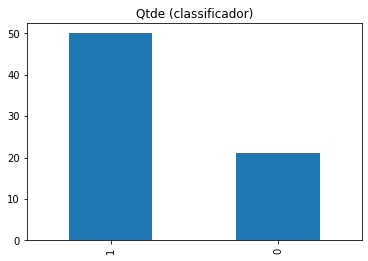

In [120]:
import matplotlib.pyplot as plt
atributo_classificador = df.Approved.value_counts()
print('NÃO:', atributo_classificador[0])
print('SIM:', atributo_classificador[1])

print('Proporção:', round(atributo_classificador[0]/atributo_classificador[1], 2), ': 1')
atributo_classificador.plot(kind='bar', title='Qtde (classificador)')

In [121]:
df.head()

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,1,0,0,0,0,6,0,1,1600,2.1,2.4,3.5,3.6,1.7,0
1,1,0,0,1,0,2,0,3,592,0.3,0.3,0.0,0.1,0.2,0
2,2,4,3,9,0,16,1,8,1110,8.0,5.0,5.0,7.0,5.0,1
3,5,1,3,9,2,11,0,8,8651,6.0,5.0,4.0,6.0,4.0,1
4,14,6,15,28,0,50,0,45,34172,8.7,9.0,6.5,10.0,8.8,1


In [106]:
labels = df.columns[:-1]
X = df[labels]
y = df['Approved']

In [107]:
#Separação de dados de Treino e Teste
from sklearn.model_selection import train_test_split
#Separação de 70% dos Dados para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [108]:
#Criação da Árvore de Decisão
from sklearn import tree
# Criação do Objeto classificador, setando a pronfundidade=8
dt = tree.DecisionTreeClassifier(max_depth=6)

#Treinando o modelo
treino_modelo = dt.fit(X_train, y_train)

In [109]:
#Verificação de importancia dos atributos para Classificação
for atributo,relevancia in zip(X,dt.feature_importances_):
    print("{}:{}".format(atributo, relevancia))

total_posts:0.0
helpful_post:0.0
nice_code_post:0.0
collaborative_post:0.0
confused_post:0.0
creative_post:0.0
bad_post:0.0
amazing_post:0.0
timeonline:0.0
sk1_classroom:0.0
sk2_classroom:1.0
sk5_classroom:0.0
sk3_classroom:0.0
sk4_classroom:0.0


In [110]:
#Teste do Modelo
teste_modelo = dt.predict(X_test)

In [111]:
# Verificando Acurácia do Modelo
acuracia_treino = dt.score(X_train, y_train)
acuracia_teste = dt.score(X_test, y_test)
print('Acurácia do Modelo com Base Treino: %.2f%%' % ((acuracia_treino)*100))
print('Acurácia do Modelo com Base Teste: %.2f%%' % ((acuracia_teste)*100))

Acurácia do Modelo com Base Treino: 100.00%
Acurácia do Modelo com Base Teste: 100.00%


In [112]:
# Verificação Cross-Validation 
from sklearn.model_selection import cross_val_score
acuracia_cross = cross_val_score(treino_modelo, X, y, cv=5, scoring='f1_macro')
acuracia_cross

array([1.        , 1.        , 1.        , 0.91812865, 1.        ])

In [113]:
#Matriz Confusão
from sklearn.metrics import confusion_matrix
print (pd.crosstab(y_test,teste_modelo, rownames=['Real'], colnames=['           Predito'], margins=True))

           Predito  0   1  All
Real                          
0                   6   0    6
1                   0  16   16
All                 6  16   22


In [114]:
from sklearn import metrics
print(metrics.classification_report(y_test,teste_modelo))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        16

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



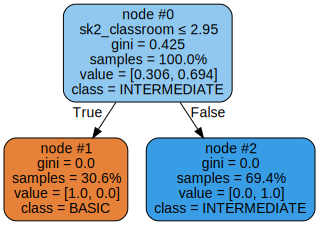

In [115]:
from graphviz import Digraph
import pydotplus
import graphviz 

arquivo_dot = tree.export_graphviz(
         dt, 
         out_file=None,
         feature_names=list(X.columns),
         class_names=('BASIC','INTERMEDIATE','ADVANCED'),  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True,
             
        )  
arvore = graphviz.Source(arquivo_dot)  
arvore_png = pydotplus.graph_from_dot_data(arquivo_dot)
arvore_png.write_png('arvore_decisao.png')
arvore